In [1]:
import  tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import cv2 as cv
from collections import Counter
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework

In [2]:
x=np.load('Dataset/all_7/x_train.npy')
y=np.load('Dataset/all_7/y_train.npy')

In [3]:
y.shape

(2632,)

In [4]:
Counter(y)

Counter({3: 524, 0: 1502, 2: 400, 1: 206})

In [5]:
for key, value in Counter(y).items():
    print(key, value/y.shape[0])

3 0.19908814589665655
0 0.5706686930091185
2 0.1519756838905775
1 0.07826747720364742


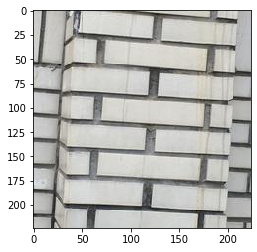

0


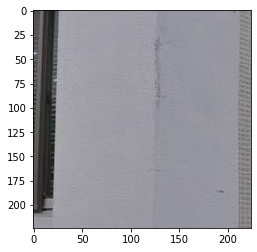

0


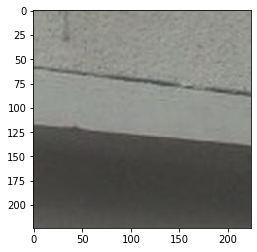

0


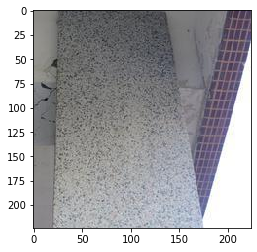

0


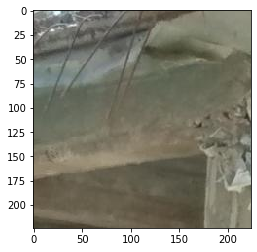

2


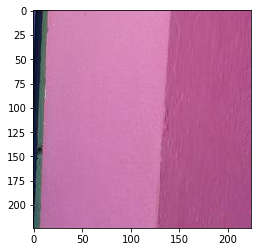

0


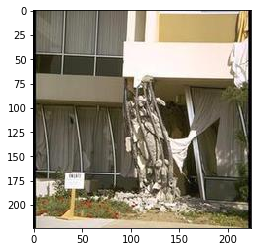

3


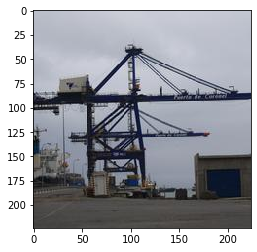

0


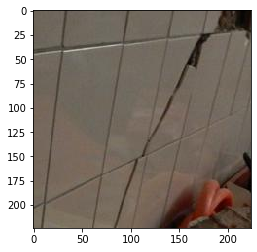

2


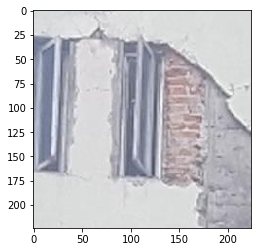

1


In [6]:
for i in range(10,20):
    plt.imshow(x[i])
    plt.show()
    print(y[i])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10, shuffle=True)
x_train,x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.11, shuffle=True) 
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)
print("x_val :", x_val.shape)
print("y_val: ", y_val.shape)

x_train : (2107, 224, 224, 3)
y_train : (2107,)
x_test : (264, 224, 224, 3)
y_test : (264,)
x_val : (261, 224, 224, 3)
y_val:  (261,)


In [8]:
# class_weights=class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# class_weights

In [9]:
y_train=to_categorical(y_train, num_classes=4)
y_test=to_categorical(y_test, num_classes=4)
y_val=to_categorical(y_val, num_classes=4)

In [10]:
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

In [11]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='densenet_weights_7.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.20,
    height_shift_range=0.20,
    horizontal_flip=True,
    zoom_range=0.15,
    fill_mode='nearest')


In [12]:
image_height=224
image_width=224

In [13]:
drop=0.25
densenet=tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=4,
)
#densenet.trainable=False
#i=0
#for layer in densenet.layers:
#    if i >=100:
#        break
#    layer.trainable=False
#    i=i+1

initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
x=densenet.output
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
#x=tf.keras.layers.Dropout(drop)(x)
#x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
#x=tf.keras.layers.Dropout(drop)(x)
#x=tf.keras.layers.BatchNormalization()(x)
p=tf.keras.layers.Dense(4,activation='softmax')(x)
model=tf.keras.Model(inputs=densenet.input, outputs=p)




print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
________________________________________________________

conv5_block15_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block15_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block15_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block15_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block15_concat (Concatena (None, 7, 7, 992)    0           conv5_block14_concat[0][0]       
                                                                 conv5_block15_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block16_0_bn (BatchNormal (None, 7, 7, 992)    3968        conv5_block15_concat[0][0]       
__________________________________________________________________________________________________
conv5_block16_0_relu (Activatio (None, 7, 7, 992)    0           conv5_block16_0_bn[0][0]         
__________

In [14]:
#opt=tf.keras.optimizers.Adam(lr=0.000055)
opt=tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [15]:
#history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=8, callbacks=[es_callback], class_weight=class_weights)

history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=8), steps_per_epoch=len(x_train)/8, epochs=30, validation_data=(x_val,y_val), callbacks=[es_callback, model_checkpoint_callback])#, class_weight=class_weights)

Epoch 1/30
263/263 [============================>.] - ETA: 0s - loss: 1.2726 - acc: 0.5526
Epoch 00001: val_acc improved from -inf to 0.60920, saving model to densenet_weights_7.h5
264/263 [==============================] - 196s 743ms/step - loss: 1.2714 - acc: 0.5529 - val_loss: 0.9052 - val_acc: 0.6092
Epoch 2/30
263/263 [============================>.] - ETA: 0s - loss: 1.0100 - acc: 0.6203
Epoch 00002: val_acc improved from 0.60920 to 0.64751, saving model to densenet_weights_7.h5
264/263 [==============================] - 92s 349ms/step - loss: 1.0098 - acc: 0.6198 - val_loss: 0.9250 - val_acc: 0.6475
Epoch 3/30
263/263 [============================>.] - ETA: 0s - loss: 0.9426 - acc: 0.6465
Epoch 00003: val_acc improved from 0.64751 to 0.66667, saving model to densenet_weights_7.h5
264/263 [==============================] - 91s 347ms/step - loss: 0.9416 - acc: 0.6469 - val_loss: 0.8511 - val_acc: 0.6667
Epoch 4/30
263/263 [============================>.] - ETA: 0s - loss: 0.9147 -

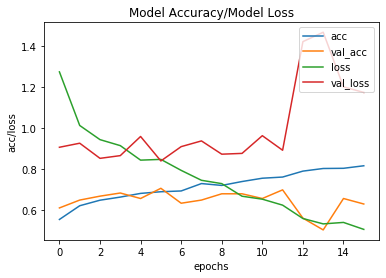

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy/Model Loss')
plt.ylabel('acc/loss')
plt.xlabel('epochs')
plt.legend(('acc','val_acc', 'loss', 'val_loss'), loc='upper right')
plt.savefig('test.jpg')
plt.show()

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model=load_model('densenet_weights_7.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
prediction=model.predict(x_test)
evalution=model.evaluate(x_test, y_test)

264/264 [==============================] - 4s 15ms/sample - loss: 0.9679 - acc: 0.6629


In [20]:
np.argmax(prediction, axis=1)[10:20],np.argmax(y_test, axis=1)[10:20]

(array([0, 0, 3, 3, 0, 0, 3, 2, 0, 0], dtype=int64),
 array([0, 0, 3, 2, 0, 0, 0, 2, 2, 2], dtype=int64))

In [21]:
cf=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(prediction,axis=1))
cf

array([[142,   0,   1,   4],
       [ 17,   0,   2,   1],
       [ 19,   0,  17,  15],
       [ 24,   1,   5,  16]], dtype=int64)

In [22]:
normalized_cf=[]
for x in cf:
    normalized_cf.append(x/sum(x))

In [23]:
normalized_cf=np.array(normalized_cf)
normalized_cf

array([[0.96598639, 0.        , 0.00680272, 0.02721088],
       [0.85      , 0.        , 0.1       , 0.05      ],
       [0.37254902, 0.        , 0.33333333, 0.29411765],
       [0.52173913, 0.02173913, 0.10869565, 0.34782609]])

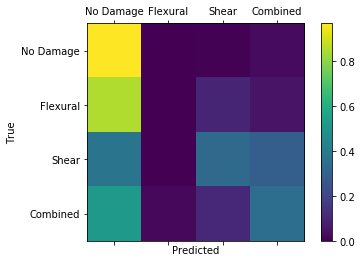

In [24]:
labels=['No Damage','Flexural','Shear','Combined']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(normalized_cf)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()